<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/3_1_Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業

1. 請將自變數X的欄位用'LSTAT'，再用線性回歸模型估算  
a. 預測係數。  
b. 繪製預測結果和實際結果的散佈圖。  
c. 整體預測結果分析。

In [1]:
# 基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
# 資料模組
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
# a的答案
X = pd.DataFrame(boston['data'], columns = boston['feature_names'])[['LSTAT']]
y = boston['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('模型預測的係數', model.intercept_, model.coef_)

模型預測的係數 35.2251661672225 [-0.98053701]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


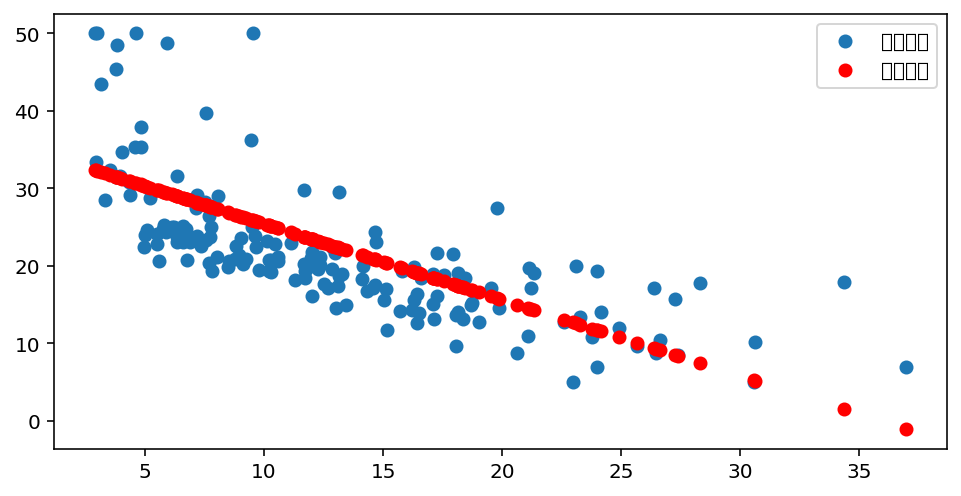

In [3]:
# b的答案
y_pred = model.predict(X_test)
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_pred, c='r', label='預測結果')
plt.legend();

In [4]:
# c的答案
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 38.410075117662345
Mean Absolute Error: 4.744269760624963
R2 Score: 0.49245729145962347


2. 請將上例的X先三次方化，再進行一次預測。  
a. 預測係數。    
b. 繪製預測結果和實際結果的散佈圖。    
c. 整體預測結果分析。

In [5]:
# a的答案
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model_pl_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_pl_3.fit(X_train, y_train)
print('模型預測的係數', 
      model_pl_3.named_steps['linearregression'].intercept_, 
      model_pl_3.named_steps['linearregression'].coef_.round(2))

模型預測的係數 49.21529013606193 [ 0.   -3.86  0.14 -0.  ]


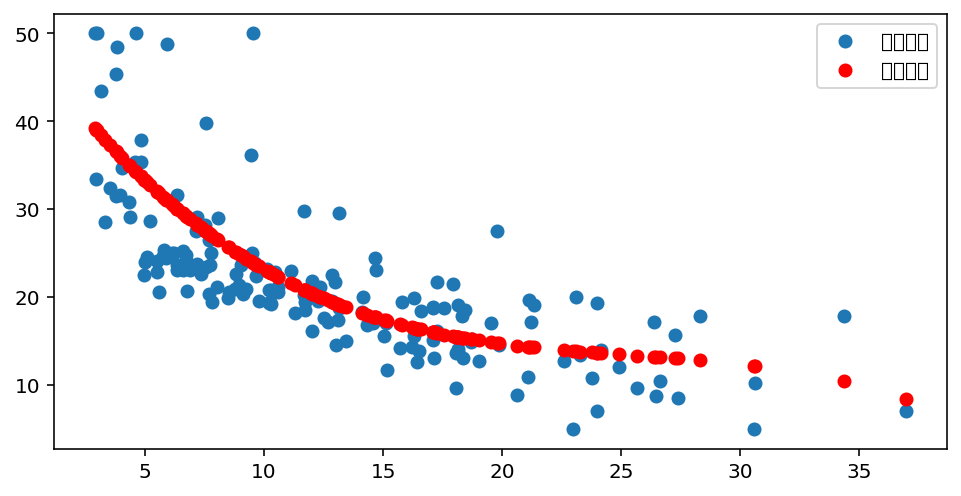

In [6]:
# b的答案
plt.figure(figsize=(8,4))
y_pred = model_pl_3.predict(X_test)
plt.scatter(X_test.iloc[:,0], y_test, label='實際資料')
plt.scatter(X_test.iloc[:,0], y_pred, c='r', label='預測結果')
plt.legend()

In [7]:
# c的答案
y_pred = model_pl_3.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 30.66871726088642
Mean Absolute Error: 4.119200933191487
R2 Score: 0.5947499769691513
